In [2]:
# Import necessary libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.preprocessing import StandardScaler

In [3]:
# Load dataset

dataset= pd.read_csv('dataset.csv')
print("Dataset Size:", dataset.shape)

# Replace 'Unknown' with NaN in Target
dataset['Genetic Disorder'].replace('Unknown', np.nan, inplace=True)
dataset['Disorder Subclass'].replace('Unknown', np.nan, inplace=True)

dataset.dropna(inplace=True)
# Alocate features and labels

X = dataset.iloc[:, :-2]  # Features
y = dataset.iloc[:, -2:]  # Labels (last two columns)

# Perform one-hot encoding on the categorical features
X = pd.get_dummies(X, drop_first=True)
# drop_first is used to drop one of the columns for each categorical feature to avoid multicollinearity.

# Check if the target variable has more than 2 classes
if y.nunique().any() > 2:
    y = pd.get_dummies(y, drop_first=True)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Dataset Size: (22083, 33)


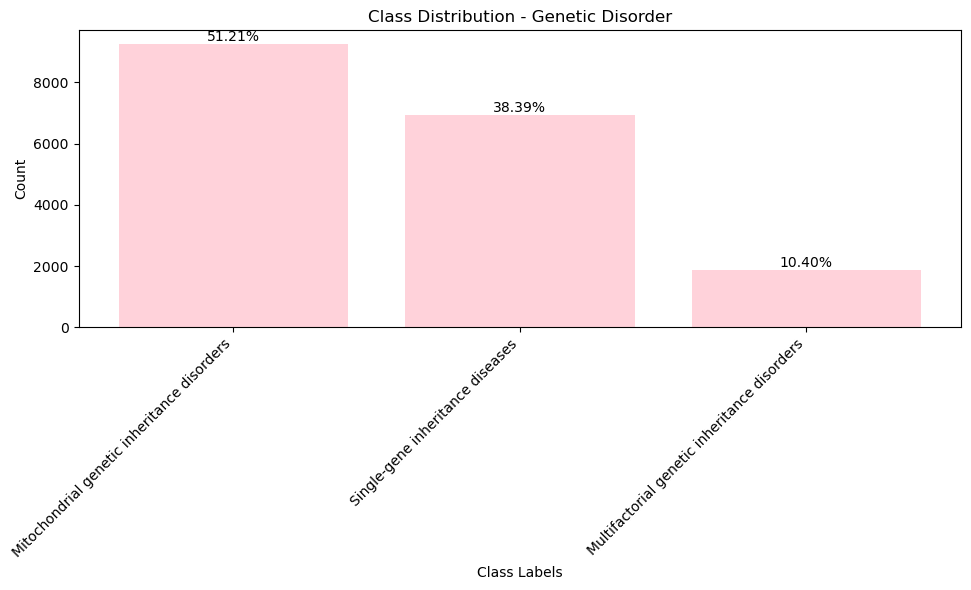

In [4]:
# Generative Disorder


class_labels_last_column = y.iloc[:, -2]

# Count the number of occurrences of each class
class_counts_gd = class_labels_last_column.value_counts()

# Calculate the percentage of each class
total_samples = len(class_labels_last_column)
class_percentages = (class_counts_gd / total_samples) * 100

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.bar(class_counts_gd.index, class_counts_gd, color='pink', alpha=0.7)

# Adding percentage text on top of each bar
for label, count, percentage in zip(class_counts_gd.index, class_counts_gd, class_percentages):
    plt.text(label, count, f'{percentage:.2f}%', ha='center', va='bottom')

plt.title('Class Distribution - Genetic Disorder')
plt.xlabel('Class Labels')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

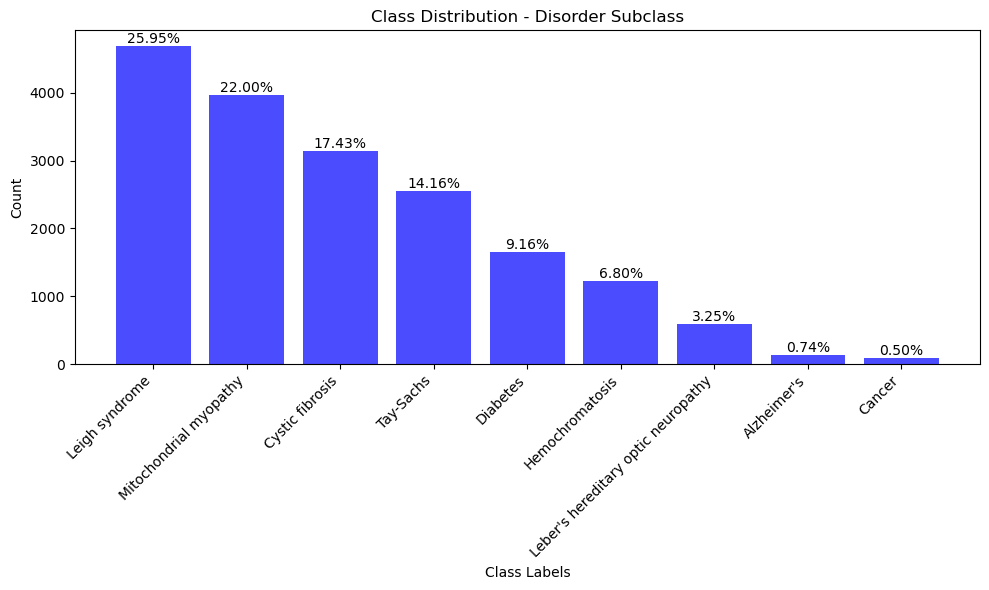

In [5]:
# Disorder Subclass

# Assuming y is your original dataset
class_labels_last_column = y.iloc[:, -1]

# Count the number of occurrences of each class
class_counts_ds = class_labels_last_column.value_counts()

# Calculate the percentage of each class
total_samples = len(class_labels_last_column)
class_percentages = (class_counts_ds / total_samples) * 100

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.bar(class_counts_ds.index, class_counts_ds, color='blue', alpha=0.7)

# Adding percentage text on top of each bar
for label, count, percentage in zip(class_counts_ds.index, class_counts_ds, class_percentages):
    plt.text(label, count, f'{percentage:.2f}%', ha='center', va='bottom')

plt.title('Class Distribution - Disorder Subclass')
plt.xlabel('Class Labels')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

# Class weights manually calculated

In [6]:
# Get the class labels and their counts
class_labels_gd = y.iloc[:, -2]
class_counts_gd = class_labels_gd.value_counts()
class_labels_ds = y.iloc[:, -1]
class_counts_ds = class_labels_ds.value_counts()


# Calculate class weights for Generative Disorder
total_samples_gd = len(class_labels_gd)
class_weights_gd = {label: 1 - (count / total_samples_gd) for label, count in class_counts_gd.items()}
print("Class Weights Generative Disorder:", class_weights_gd)

# Calculate class weights for Disorder Subclass
total_samples_ds = len(class_labels_ds)
class_weights_ds = {label: 1 - (count / total_samples_ds) for label, count in class_counts_ds.items()}
print("Class Weights Disorder Subclass:", class_weights_ds)

Class Weights Generative Disorder: {'Mitochondrial genetic inheritance disorders': 0.48794813542417026, 'Single-gene inheritance diseases': 0.6160580705934504, 'Multifactorial genetic inheritance disorders': 0.8959937939823793}
Class Weights Disorder Subclass: {'Leigh syndrome': 0.740510888236272, 'Mitochondrial myopathy': 0.7799634288247355, 'Cystic fibrosis': 0.8257328087770821, 'Tay-Sachs': 0.8583698121571453, 'Diabetes': 0.9084058292236937, 'Hemochromatosis': 0.9319554496592232, "Leber's hereditary optic neuropathy": 0.9674738183631628, "Alzheimer's": 0.9926303540754696, 'Cancer': 0.9949576106832161}
